In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"B:\user vs bot classifier\bots_vs_users.csv")
df

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [5]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'is_blacklisted',
       'has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbe

In [6]:
df.describe()

,target,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness
count,5874.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.500000,18.629044,19.552487,0.156463,0.143918,7.730661,544.752035,0.895945,0.610812,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009
std,0.500043,4.231994,41.954881,0.202730,0.187085,11.278711,746.728130,0.170084,2.461709,0.397830,0.033136,1617.635460,154.970296,0.009545,0.229815
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.400000,0.000000,0.000000,1.100000,86.600000,0.850000,0.000000,0.050000,0.000000,9.125000,1.980000,0.000000,0.580000
50%,0.500000,20.000000,7.600000,0.100000,0.050000,3.400000,267.800000,0.950000,0.000000,0.300000,0.000000,268.950000,30.950000,0.000000,0.710000
75%,1.000000,20.000000,26.075000,0.200000,0.200000,7.850000,616.850000,1.000000,0.200000,0.900000,0.000000,746.050000,89.480000,0.000000,0.830000
max,1.000000,20.000000,894.900000,1.000000,1.000000,61.600000,5841.250000,1.000000,64.050000,1.000000,0.950000,41415.700000,2866.590000,0.300000,1.000000


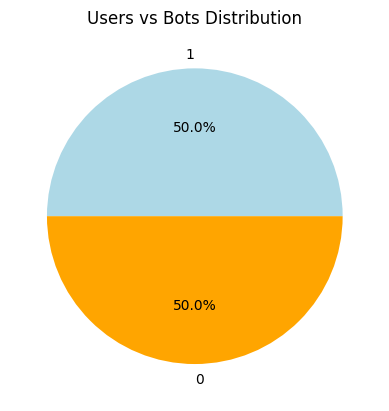

In [7]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Users vs Bots Distribution")
plt.ylabel("")
plt.show()

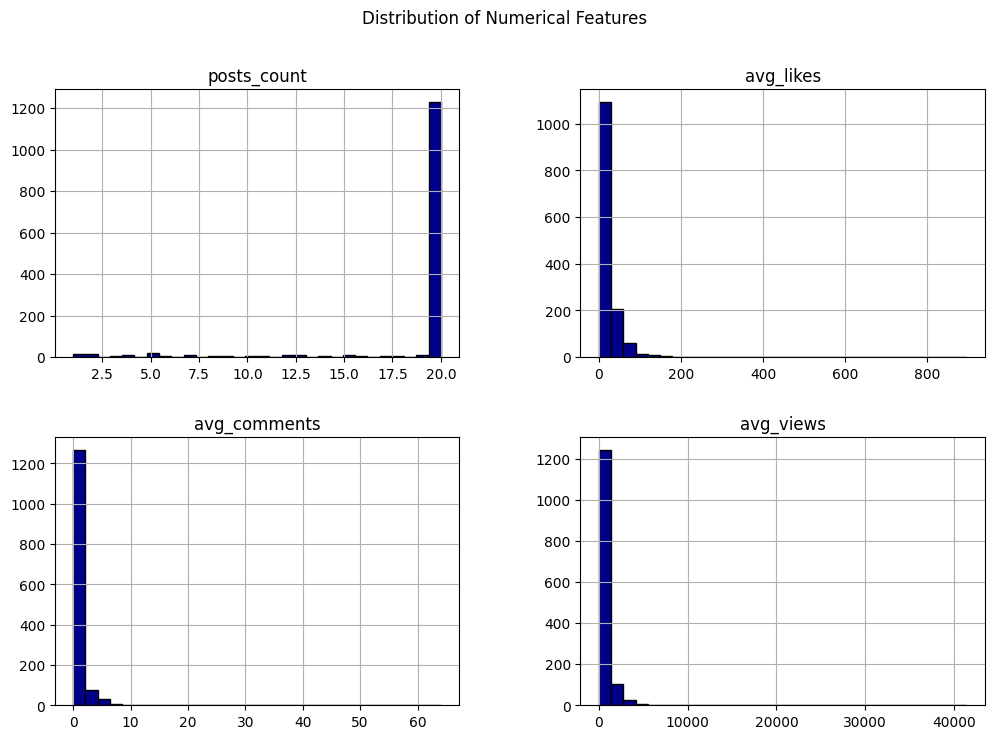

In [8]:
num_cols = ['posts_count', 'avg_likes', 'avg_comments', 'avg_views', 'subscribers_count']
df[num_cols].hist(figsize=(12, 8), bins=30, color='darkblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

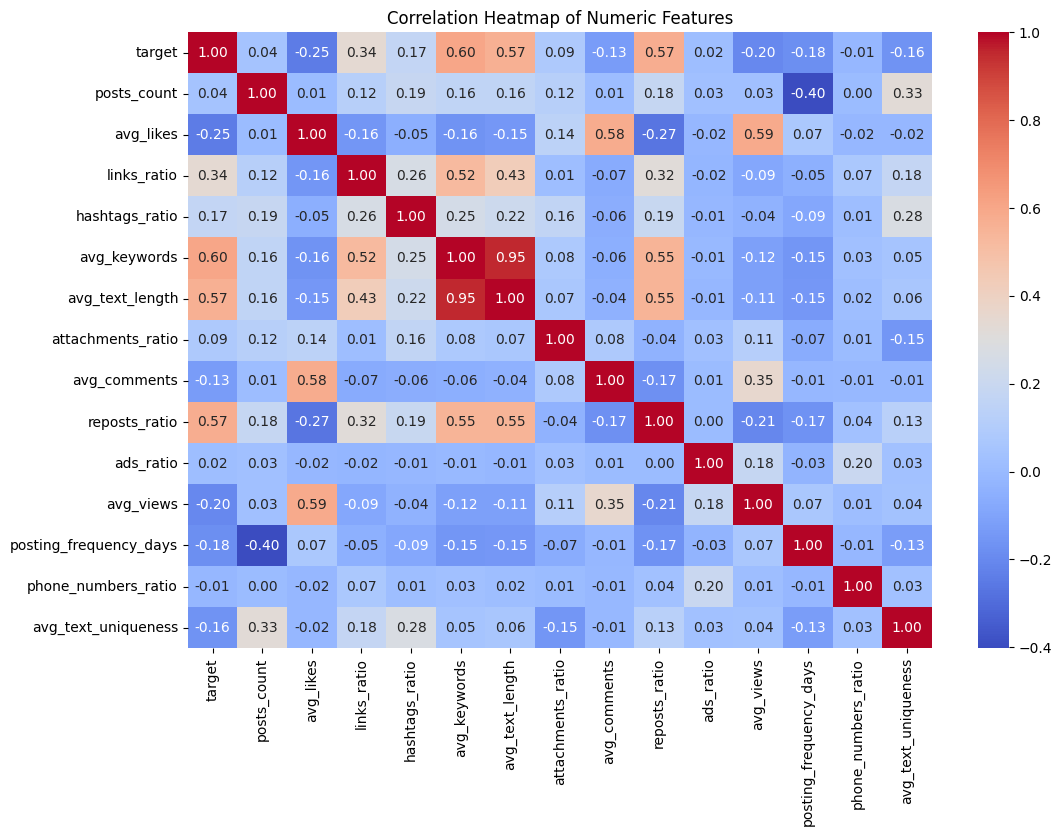

In [9]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# If there are at least four numeric columns, generate a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric features to generate a correlation heatmap.')

In [10]:
x=df.drop(columns=['target'])
y=df['target']

In [11]:
x

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1.0,1.0,1.0,0.0,0.0,Unknown,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
5870,1.0,Unknown,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5871,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5872,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Moscow,1.0,0.0,1.0,Unknown


In [12]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5869    0
5870    0
5871    0
5872    0
5873    0
Name: target, Length: 5874, dtype: int64

In [13]:
#Selecting categorical features
for col in x.select_dtypes(include=['object']).columns:
    x[col] = x[col].astype('category')

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
#Splitting data and transforming into Dmatrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [16]:
X_train

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
5013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,316.25,133.74,0.0,0.94,Saint Petersburg,1.0,1.0,0.0,Unknown
4274,1.0,Unknown,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,Unknown,Unknown,Unknown,Unknown
1660,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1119,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.95,0.01,0.0,0.78,Unknown,Unknown,Unknown,Unknown,Unknown
5227,1.0,1.0,1.0,0.0,0.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0.0,823.30,55.29,0.0,0.89,Unknown,Unknown,Unknown,Unknown,Unknown
5303,1.0,Unknown,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,1.0
3379,1.0,1.0,1.0,0.0,1.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
4794,1.0,1.0,1.0,0.0,1.0,Unknown,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown


In [17]:
X_test

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
3990,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Kostomuksha,1.0,0.0,1.0,1.0
5087,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,1.0,0.0,Unknown
5785,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Saint Petersburg,1.0,0.0,1.0,1.0
1894,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.3,0.02,0.0,0.69,Unknown,Unknown,Unknown,Unknown,Unknown
411,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
5594,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2129,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4201,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,388.0,4.08,0.0,0.64,Kostomuksha,1.0,0.0,1.0,Unknown


In [18]:
y_train

5013    0
4274    0
1660    1
1119    1
5227    0
       ..
5398    0
5303    0
3379    0
4794    0
1488    1
Name: target, Length: 4699, dtype: int64

In [19]:
y_test

3990    0
5087    0
5785    0
1894    1
411     1
       ..
173     1
5594    0
2129    1
4201    0
219     1
Name: target, Length: 1175, dtype: int64

In [20]:
#Define custom accuracy metric
def accuracy(preds, dtrain):
    labels = dtrain.get_label()
    return 'accuracy', float(sum(labels == (preds > 0.5))) / len(labels)

In [21]:
evals = [(dtrain, 'train'), (dtest, 'test')]
evals_result = {}

In [22]:
#Define model parametrs
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

#Define model and start training
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    custom_metric=accuracy,
    evals_result=evals_result,
    verbose_eval=0
)

In [23]:
train_acc = evals_result['train']['accuracy']
test_acc = evals_result['test']['accuracy']

In [24]:
train_acc

[0.974675,
 0.976378,
 0.979144,
 0.97957,
 0.980634,
 0.982124,
 0.982124,
 0.982337,
 0.982124,
 0.982124,
 0.982337,
 0.982549,
 0.982549,
 0.982549,
 0.982762,
 0.983188,
 0.982975,
 0.983401,
 0.983614,
 0.983826,
 0.984039,
 0.984039,
 0.984039,
 0.984039,
 0.984252,
 0.984252,
 0.984465,
 0.98489,
 0.985316,
 0.985316,
 0.985742,
 0.985742,
 0.985742,
 0.985742,
 0.985742,
 0.985742,
 0.985529,
 0.985529,
 0.985529,
 0.985742,
 0.985954,
 0.986167,
 0.986167,
 0.98638,
 0.98638,
 0.986593,
 0.986806,
 0.987231,
 0.987231,
 0.98787,
 0.987444,
 0.98787,
 0.987444,
 0.987444,
 0.987657,
 0.987657,
 0.987657,
 0.987657,
 0.987657,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.98787,
 0.988083,
 0.988295,
 0.988295,
 0.988721,
 0.988721,
 0.988508,
 0.988508,
 0.988721,
 0.989147,
 0.989359,
 0.989147,
 0.989147,
 0.989147,
 0.989572,
 0.989572,
 0.989572,
 0.989572,
 0.989572,
 0.989359,
 0.989359,
 0.989998,
 0.990211,
 0.989998,
 0.9

In [25]:
test_acc

[0.960851,
 0.962553,
 0.963404,
 0.963404,
 0.964255,
 0.965957,
 0.965106,
 0.966809,
 0.966809,
 0.965957,
 0.966809,
 0.966809,
 0.966809,
 0.966809,
 0.966809,
 0.968511,
 0.96766,
 0.96766,
 0.96766,
 0.966809,
 0.966809,
 0.966809,
 0.966809,
 0.966809,
 0.966809,
 0.968511,
 0.969362,
 0.969362,
 0.969362,
 0.968511,
 0.968511,
 0.969362,
 0.969362,
 0.969362,
 0.969362,
 0.971064,
 0.971064,
 0.971064,
 0.971064,
 0.971064,
 0.971064,
 0.970213,
 0.971064,
 0.971064,
 0.970213,
 0.971064,
 0.971064,
 0.971064,
 0.971915,
 0.971915,
 0.971915,
 0.971915,
 0.972766,
 0.972766,
 0.972766,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.972766,
 0.972766,
 0.971915,
 0.973617,
 0.972766,
 0.972766,
 0.972766,
 0.972766,
 0.973617,
 0.972766,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.974468,
 0.973617,
 0.974468,
 0.973617,
 0.972766,
 0.972766,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.973617,
 0.972766,
 0.972766,
 0

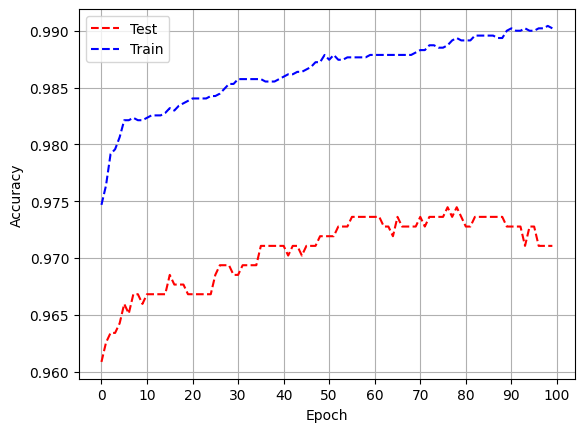

In [26]:
plt.plot(test_acc,label='Test',linestyle='--',color='r')
plt.plot(train_acc,label='Train',linestyle='--',color='b')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([i*10 for i in range(11)])
plt.legend()
plt.show()

In [27]:
#Calculating fpr and tpr to plot ROC
y_pred_proba = model.predict(dtest)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [28]:
y_pred_proba

array([4.38746577e-03, 1.08744374e-04, 2.89044285e-04, ...,
       9.97851729e-01, 1.48412611e-04, 9.96591806e-01], dtype=float32)

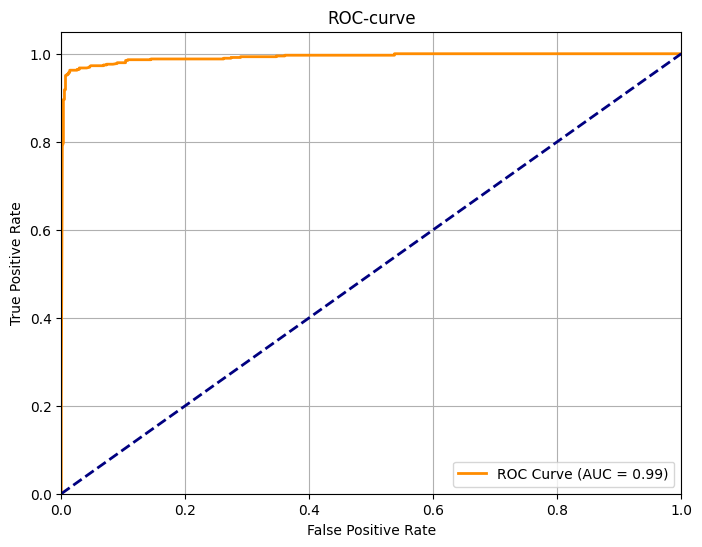

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [30]:
#Final test accuracy
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9711


In [31]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [32]:
# import pickle


# # Saving Random Forest model 
# model_file_name = "user_bot_model.pkl"

# try:
#     with open(model_file_name, 'wb') as file:
#         pickle.dump(y_pred_proba, file)
#     print(f"Model saved successfully to {model_file_name}")
# except Exception as e:
#     print(f"Error saving the model: {e}")

In [33]:
import joblib

In [34]:
joblib.dump(model, "xgb_model.pkl")

['xgb_model.pkl']

In [35]:
joblib.dump(x.columns.tolist(),"features.pkl")

['features.pkl']